#### Classifier - Large Data Set      
[Jake Vanderplas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html) explains classification of [MNIST](https://en.wikipedia.org/wiki/MNIST_database) digits using Gausian Naive Bayes 


In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image, display
import cv2
import math
import matplotlib.pyplot as plt
from random import randint  

In [3]:
image = cv2.imread('../Figures/apic.jpeg') #  image_C.png, image_S.png image_M.jpg  
image1 = image[:, :, ::-1]
print(f"\n{math.prod(image1.shape):,} pixels in the picture\n        Whose picture is it?\n")
print(image1[0][:6])


120,000 pixels in the picture
        Whose picture is it?

[[164 180 203]
 [164 180 203]
 [165 180 203]
 [165 180 203]
 [164 180 203]
 [163 181 203]]


#### MNIST   
MNIST (Modified National Institute of Standards and Technology database) is a simple well documented dataset.  
Like Iris flowers.  
Images of handwritten digits 0 to 9.   
Each image has 28 X 28 pixels (= 784) of one byte each, with value of 0 (white) to 255 (black).    
7,000 examples for each digit.  
60,000 images in training set and 10,000 in test set.  
The original files are in .idx-ubyte format. Kaggle site has them in CSV format as well.  

##### Classification Performance   
12% error rate using a simple linear classifier.   
0.09% error rate using Convolutional Nural Network after data augmentation (rotation and translation) 

##### Experiment with our hand-built Logistics Regression      
MNIST dataset is large for a personal laptop.  
**MemoryError**: Unable to allocate 26.8 GiB for an array with shape (60000, 60000) and data type float64  

Read the top 1,000 rows to prototype.     


Note: Seaborn has a sample with 8X8 pixel images  
The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.   
1,797 samples and 64 features.  

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

print(f"MNIST Data shape: {digits.images.shape}")
print(f"MNIST Features  : {digits.data.shape}")
print(f"MNIST Labels    : {digits.target.shape}")
print(f"Sample Labels   : {digits.target[:15]}")

MNIST Data shape: (1797, 8, 8)
MNIST Features  : (1797, 64)
MNIST Labels    : (1797,)
Sample Labels   : [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4]


In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

#### First learning step      
Download top 1000 rows of MNIST   
Narrow down to binary classification by selecting only one digit.  

In [6]:
df_test = pd.read_csv('../MNIST_Data/mnist_test.csv', nrows=1000)
df_train = pd.read_csv('../MNIST_Data/mnist_train.csv', nrows=1000)

In [7]:
print(f"Training set: {df_train.shape[0]:,d}; {df_train.shape[1]}\nTest set:     {df_test.shape[0]:,d}; {df_test.shape[1]}")


Training set: 1,000; 785
Test set:     1,000; 785


In [8]:
X_train = df_train.iloc[:,1:].values
Y_train = df_train.iloc[:,0].values
X_test = df_test.iloc[:,1:].values
Y_test = df_test.iloc[:,0].values

print(f"{X_train.shape = }\n{Y_train.shape = }\n {X_test.shape = }\n {Y_test.shape = }") 


X_train.shape = (1000, 784)
Y_train.shape = (1000,)
 X_test.shape = (1000, 784)
 Y_test.shape = (1000,)


#### Frequency of digits 0 to 9 in training and test sets   

In [ ]:
print(df_train.label.value_counts())
print(df_test.label.value_counts())


Label: 8


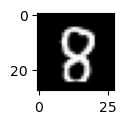

In [16]:
row = randint(0, 999)
print(f"\nLabel: {Y_train[row]}")
plt.figure(figsize=(1,1))
plt.imshow(X_train[row].reshape(28, 28), cmap='gray');

#### Add bias to the feature sets  

In [17]:
print(f"Before adding bias: {X_train.shape = }, {X_test.shape = }")
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
print(f"After adding bias:  {X_train.shape = }, {X_test.shape = }")

Before adding bias: X_train.shape = (1000, 784), X_test.shape = (1000, 784)
After adding bias:  X_train.shape = (1000, 785), X_test.shape = (1000, 785)


#### Encode Five   
Make a binary classifier as the first step in understanding the concepts   
Encode labels 5 as 1 and others as 0   
        

In [18]:
print(f"Y_Train: {Y_train[:20]}")
Y_train = (Y_train==5).astype(int)
print(f"Encoded: {Y_train[:20]}");print()

print(f"Y_Test:  {Y_test[:20]}")
Y_test = (Y_test==5).astype(int)
print(f"Encoded: {Y_test[:20]}")

Y_Train: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
Encoded: [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]

Y_Test:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Encoded: [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0]


#### Classify   
Use the logistic regression code for classification      

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, w):
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)

def classify(X, w):
    return np.round(predict(X, w))

def loss(X, Y, w):
    y_hat = predict(X, w)
    first_term = Y * np.log(y_hat)
    second_term = (1 - Y) * np.log(1 - y_hat)
    return -np.average(first_term + second_term)

def gradient(X, Y, w):
    return np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]

def train(X, Y, iterations, lr):
    data = []
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        data.append([i, loss(X,Y,w)])
        w -= gradient(X, Y, w) * lr
    return w, pd.DataFrame(data, columns= ['i', 'loss'])

Y = Y_train.reshape(-1, 1)
w, df = train(X_train, Y, iterations=100, lr=1e-5)

In [20]:
def test(X, Y, w):
    total_examples = X.shape[0]
    correct_results = np.sum(classify(X, w) == Y)
    success_percent = correct_results * 100 / total_examples
    return f"{correct_results}/{total_examples} ({success_percent:.2f}%)"

In [21]:
Y = Y_train.reshape(-1, 1)
print(f"\nSuccess with Training Set: {test(X_train, Y, w)}")

Y_ = Y_test.reshape(-1, 1)
print(f"Success with Test Set:     {test(X_test, Y_, w)}")


Success with Training Set: 969/1000 (96.90%)
Success with Test Set:     949/1000 (94.90%)


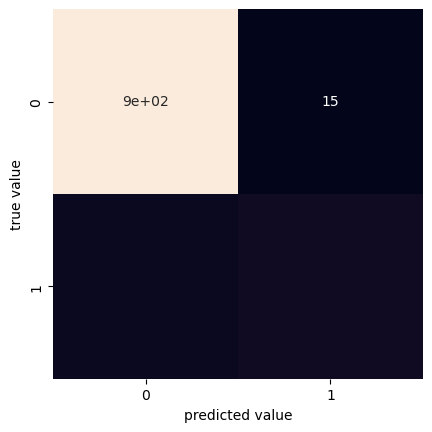

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_model = classify(X_test, w)
mat = confusion_matrix(Y_, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

![](../Figures/cnn-1.png)

#### Hyperparameters   
lr chosen is 0.00001. exponentials and logarithms have some side effects.  
The program may give strange results with too small or too large lr.   

#### Task 1   
1. Change lr and check accuracy   
2. Change number of iterations and check the effect  
3. Try to identify digits 0 to 9 and record the success% for each.   

#### Task 2   
SONAR: Sound Navigation and Ranging       
RADAR: Radio Detection and Ranging      

1. [Sonar dataset](https://www.kaggle.com/datasets/mattcarter865/mines-vs-rocks?select=sonar.all-data.csv) from Kaggle is downloaded at /ML_Course/Data/Sonar.csv
    It has 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions.  and 97 patterns obtained from rocks under similar conditions.  Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time.  The labels are "R" for rock and "M" for mine (metal cylinder).  
2. Shuffle the dataset before splitting (to train and test sets) as the original is sorted by label.  
3. Remember to add bias column tp X_train and X_test.  
4. You may start with lr=0.01 
5. Too large a learning rate can cause errors when calculating loss because the logarithms andexponentials generate huge or tiny numbers.
6. Excessive iterations may reduce the accuracy due to overfitting. 
7. Aim for >75% accuracy.  

Germany built 1,162 U-boats during World War II and 785 were destroyed by the end of the war.  
The remaining 377 U-boats were surrendered (or scuttled by the Germans).  
In contrast, U-boats sank about 3,000 Allied ships (merchant ships and warships)

Indian Navy has only 16 submarines (U-boats).  